Chapitre 5 : corrigé des exercices I, V, VII et VIII
====================================================

Groupe 1.1. - TD sur les éléments finis - 16 janvier 2026.

# Exercice I

Soit $f\in L^{2}(0,1)$.

On considère

$$ (5.1)\quad\left\{
    \begin{array}{ll}
       - \displaystyle u^{\prime\prime}=f \quad \textrm{dans}\ ]0,1[,\\
       u(0)=\alpha\quad\textrm{et}\quad u(1)=\beta. 
    \end{array}\right.$$
                                         
avec $\alpha,\beta\in\mathbb{R}$.

Dans ce notebook, nous aurons besoins de plusieurs bibliothèques, que nous indiquons ci-après.

In [1]:
# Deux bibliothèques standards pour les fonctions mathématiques

import math
import numpy as np

# Egalement scipy pour l'intégration numérique

from scipy.integrate import quad
from scipy import special

# Pour faire des graphes...

import matplotlib.pyplot as plt

## Question 1

Pour déterminer une EDP avec conditions de Dirichlet homogène qui soit équivalente à (5.1), on suit la technique de relèvement.

Il suffit de choisir une fonction $u_{0}$ valant $\alpha$ en $0$ et $\beta$ en $1$, par exemple 
$u_0(x)=\alpha (1-x)+\beta x$ et de considérer $\tilde{u}=u-u_0$. 
La fonction $\tilde{u}$ est alors solution de 

$$\left \{
    \begin{array}{l}
      - \displaystyle \tilde{u}''= g\quad\textrm{dans} ]0,1[,\\
      \tilde{u}(0)=0\quad\textrm{et}\quad \tilde{u}(1)=0. 
    \end{array}
   \right. $$

où $g(x) = f(x)+u_{0}''(x)$.

Le choix fait ici pour $u_0$ nous conduit à avoir $u_0''=0$ si bien que $g=f$ (et qu'il est inutile de définir une fonction supplémentaire).

In [2]:
def u0(x):
    return alpha*(1-x) + beta*x

# Il ne faudra pas oublier de définir alpha et beta avant d'utiliser la fonction u0

## Question 2

On cherche la formulation variationnelle.

Pour simplifier les notations, dans cette question on omet le tilde et on note $u$ au lieu de $\tilde{u}$.

La formulation variationnelle obtenue est $$a(u,\varphi)=l(\varphi)$$
où $a$ est définie de $C^1_0([0,1])\times C^1_0([0,1])$ dans ${\mathbb{R}}$ par
$$a(u,v)=\int_0^1 u'v'$$
et $l$ est définie de $C^1_0([0,1])$ dans $\mathbb {R}$ par $$l(v)=\int_0^1 gv$$

## Question 3

Soit $J\in\mathbb{N}^*$ et $$h=\frac{1}{J+1}$$ 

In [3]:
J = 5       # Nombre de noeuds sans les extrémités
h = 1/(J+1) # pas de discrétisation

On considère une subdivision $(x_j)_{j\in\{0,...,J+1\}}$ de $[0,1]$ où $x_j=jh$.
Soit $P_1$ l'ensemble des polynômes de degré inférieur où égal à 1 et


$$H_{0,h}=  \{v \in C^0([0,1])\ |\ \forall j\in\{0,...,J\},\;v_{|[x_j,x_{j+1}]}\in P_1\ \textrm{et}\ v(0)=v(1)=0\}$$

On note $N_h$ la dimension de $H_{0,h}$.
On a $N_h=J$.

On considère la base $(\phi_1,...,\phi_{N_h})$ de $H_{0,h}$ constituée des fonctions chapeau.

$$\phi_j(x)=\left\{\begin{array}{lll}
    0 & \textrm{si} & x\in[0,(j-1)h[\\
    \frac{1}{h}x-j+1 & \textrm{si} & x\in [(j-1)h,jh]\\
    -\frac{1}{h}x+j+1 & \textrm{si} & x\in ]jh,(j+1)h]\\
    0 & \textrm{si} & x\in](j+1)h,1]
    \end{array}
    \right.$$

In [4]:
# On défini les fonctions chapeau

def phi(x,j):
    if x<(j-1)*h:
        return 0
    elif x<j*h:
        return 1+(x-j*h)/h
    elif x<(j+1)*h:
        return 1-(x-j*h)/h
    else: # x>(j+1)*h
        return 0

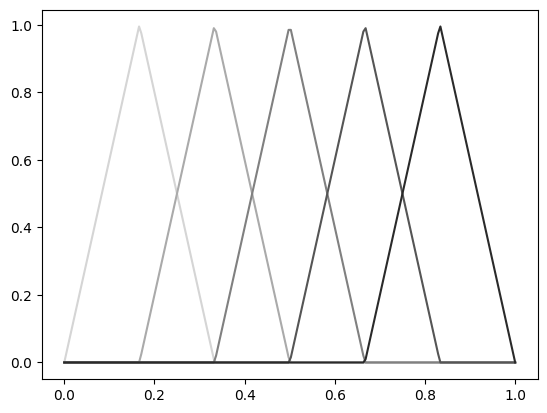

In [5]:
# On les visualise avec un dégradé de gris 

# Nombre de points utilisés pour représenter la fonction
Nx = 200 

x = np.arange(Nx,dtype=float)
y = np.arange(Nx,dtype=float)

for j in range(1,J+1): # j varie entre 1 et J, ne pas se laisser pieger par range()

    s = 0
    
    for t in np.linspace(0.0,1.0,Nx):
        x[s] = t
        y[s] = phi(t,j)
        s = s+1
    
    couleur = 1-j/(J+1)
    
    plt.plot(x,y,color=(couleur,couleur,couleur))

plt.show()

# Exercice V

## Question 1
$$\forall i\in[1,J],\ a(u_h,\phi_i)=l(\phi_i)$$ 
équivaut à $$\forall i\in[1,J],\ a\left(\sum_{j=1}^Ju_h^j\phi_j,\phi_i\right)=l(\phi_i)$$
équivaut à $$\forall i\in[1,J],\ \sum_{j=1}^Ju_h^ja(\phi_j,\phi_i)=l(\phi_i)$$
ce qui équivaut à $$A_hU_h=F_h$$
en notant 
- $A_h$ la matrice $J\times J$ dont les coefficients sont $a(\phi_j,\phi_i)$ à la ligne $i$ et colonne $j$
- $U_h$ le vecteur de $\mathbb{R}^J$ dont les coeffcients sont $u_h^1,\ldots,u_h^J$
- $F_h$ le vecteur de $\mathbb{R}^J$ dont le coefficient à la ligne $i$ est $l(\phi_i)$

## Question 2
Pour calculer $A_h$ on peut :
- soit faire le calcul numérique de $a(\phi_i,\phi_j)$
- soit faire le calcul à la main de $a(\phi_i,\phi_j)$ puis créer la matrice qui correspond.

Il y a donc deux méthodes.

Nous procédons ici par calcul numérique de $a(\varphi_i,\varphi_j)$.
Dans l'exercice VII, on fera le calcul à la main (ou on utilisera le résultat du cours où ce calcul à la main a été fait).

In [6]:
# On défini les dérivées des fonctions chapeau

def phi_prime(x,j):
    if x<(j-1)*h:
        return 0
    elif x<j*h:
        return 1/h
    elif x<(j+1)*h:
        return -1/h
    else: # x>(j+1)*h
        return 0

In [7]:
def phi_prime_phi_prime(x,i,j):
    # Retourne phi_i'(x) * phi_j'(x)
    return phi_prime(x,i)*phi_prime(x,j)

In [8]:
Ah = np.zeros((J,J),float)

In [9]:
Ah

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [10]:
for i in range(J):
    for j in range(J):
        integrale, erreur = quad(phi_prime_phi_prime, 0, 1, args=(i+1,j+1))
        Ah[i,j] = integrale

# Attention les éléments de Ah sont numérotés de 0 à J-1 et les éléments de la base de 1 à J.

In [11]:
Ah

array([[12., -6.,  0.,  0.,  0.],
       [-6., 12., -6.,  0.,  0.],
       [ 0., -6., 12., -6.,  0.],
       [ 0.,  0., -6., 12., -6.],
       [ 0.,  0.,  0., -6., 12.]])

## Question 3

On prend $f(x)=12x^2$ et $\alpha=1$, $\beta=2$.

In [12]:
alpha = 1
beta = 2

def f(x):
    return 12*x*x

Calculons $F_h$

In [13]:
def f_times_phi(x,j):
    return f(x)*phi(x,j)

In [14]:
Fh = np.zeros((J),float)

In [15]:
Fh

array([0., 0., 0., 0., 0.])

In [16]:
for i in range(J):
    integrale, erreur = quad(f_times_phi, 0, 1, args=(i+1))
    Fh[i] = integrale

In [17]:
Fh

array([0.06481481, 0.23148148, 0.50925926, 0.89814815, 1.39814815])

## Question 4

On résoud le système $A_hU_h=F_h$.

In [18]:
Uh = np.linalg.solve(Ah,Fh)

In [19]:
Uh

array([0.16589506, 0.32098765, 0.4375    , 0.4691358 , 0.35108025])

## Question 5

On reconstruit u à partir des coefficients que l'on vient de trouver.

In [20]:
def u_releve(x): # u tilde

    val = 0

    for j in range(1,J+1): 
        val = val + Uh[j-1]*phi(x,j)

    return(val)

In [21]:
def u_non_releve(x): # solution de (5.1)
    return u_releve(x) + u0(x)

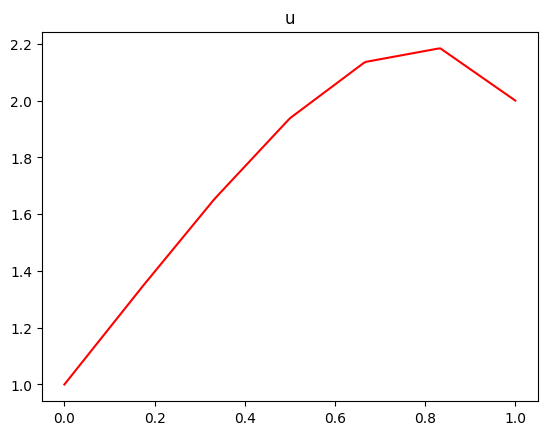

In [22]:
# On le représente

# Nombre de points utilisés pour représenter la fonction
Nx = 200 

x = np.arange(Nx,dtype=float)
y = np.arange(Nx,dtype=float)

s = 0

for t in np.linspace(0.0,1.0,Nx):
    x[s] = t
    y[s] = u_non_releve(t)
    s = s+1
        
plt.title("u")
plt.plot(x,y,'r')
plt.show()

## Question 6
On peut calculer la solution de l'équation à la main par double intégration de $f$ et fixation des deux constantes qui apparaissent à partir de $u(0)$ et $u(1)$. On trouve alors $$u(x)=-x^4+2x+1$$
Représentons cette fonction.

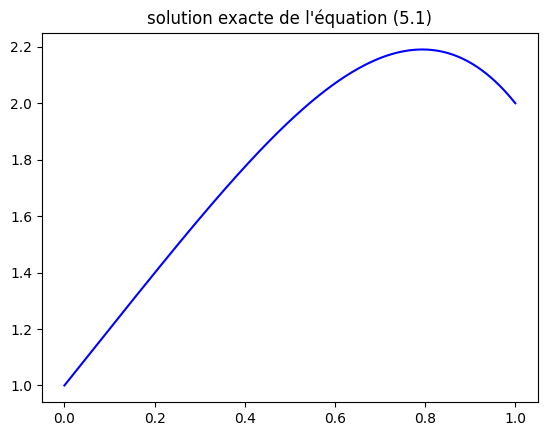

In [23]:
z = np.arange(Nx,dtype=float)

s = 0

for t in np.linspace(0.0,1.0,Nx):
    z[s] = -t**4+2*t+1 
    s = s+1
    
plt.title("solution exacte de l'équation (5.1)")
plt.plot(x,z,'b')
plt.show()

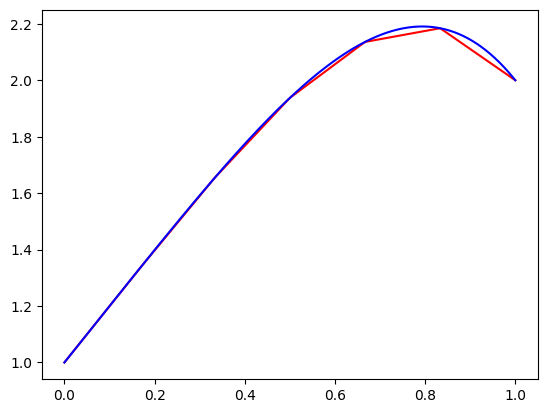

In [24]:
plt.plot(x,y,'r')
plt.plot(x,z,'b')

In [25]:
max(abs(y-z))

np.float64(0.03509102582131929)

# Exercice VII
Construction de la matrice de rigidité à partir de la connaissance du cours, c'est-à-dire détermination directe de $a(\varphi_i,\varphi_j)$ et non par apporoximation numérique comme fait précédemment.

In [26]:
Ah_methodedecours = np.zeros((J,J), float)

In [29]:
for i in range(J):
    Ah_methodedecours[i,i] = 2.0/h

for i in range(J-1):
    Ah_methodedecours[i,i+1] = -1.0/h
    Ah_methodedecours[i+1,i] = -1.0/h

In [30]:
Ah_methodedecours

array([[12., -6.,  0.,  0.,  0.],
       [-6., 12., -6.,  0.,  0.],
       [ 0., -6., 12., -6.,  0.],
       [ 0.,  0., -6., 12., -6.],
       [ 0.,  0.,  0., -6., 12.]])

In [31]:
Ah

array([[12., -6.,  0.,  0.,  0.],
       [-6., 12., -6.,  0.,  0.],
       [ 0., -6., 12., -6.,  0.],
       [ 0.,  0., -6., 12., -6.],
       [ 0.,  0.,  0., -6., 12.]])

In [32]:
Ah-Ah_methodedecours

array([[-3.55271368e-15,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.55271368e-15,  1.77635684e-15,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.77635684e-15,  1.77635684e-15,
         1.77635684e-15,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.77635684e-15,
        -3.55271368e-15,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.55271368e-15]])

## Exercice VIII

In [33]:
from fenics import *

/opt/homebrew/anaconda3/envs/fenics-env/lib/python3.14/site-packages/ufl/__init__.py:250: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [34]:
# Création du maillage de [0,1]
mesh = IntervalMesh(J+1,0,1)

In [36]:
print(mesh)

In [39]:
# On définit l'espace fonctionnel
V = FunctionSpace(mesh,'P',1)

In [40]:
print(V)

FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', interval, 1), dim=1), 0), FiniteElement('Lagrange', interval, 1))


In [42]:
# Conditions aux limites
u0 = Constant(1.0) # u(0)=1
u1 = Constant(2.0) # u(1)=2
bc0 = DirichletBC(V,u0,'on_boundary && near(x[0], 0.0)')
bc1 = DirichletBC(V,u1,'on_boundary && near(x[0], 1.0)')

In [43]:
# On définit f
f = Expression('12*x[0]*x[0]',degree=2)

In [44]:
# On définit le problème variationnel
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u),grad(v))*dx
L = f*v*dx

In [45]:
# On construit A (Ah) et b (Fh)
A , b = assemble_system(a,L,[bc0,bc1])

In [46]:
print(A)

In [47]:
print(b)

In [49]:
# Résolution du système
u_sol = Function(V)
solve(A,u_sol.vector(),b)

1

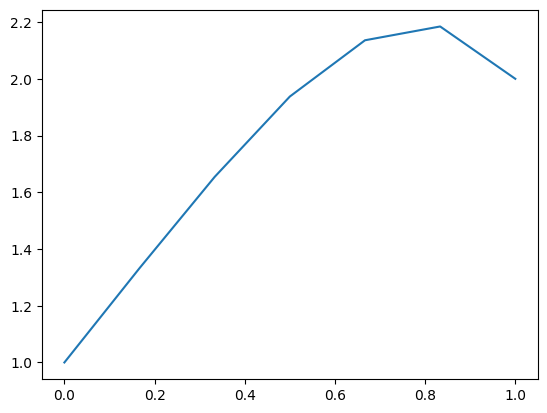

In [50]:
plot(u_sol)

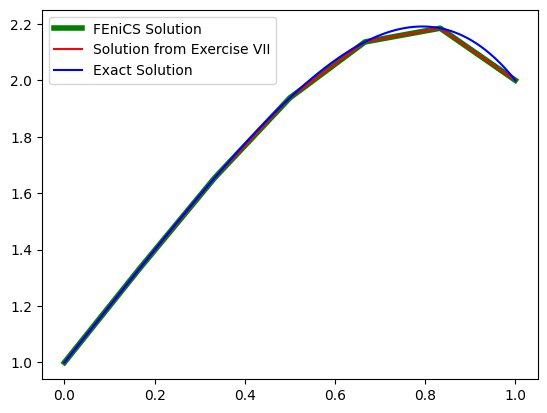

In [51]:
x_values_fenics = np.array([mesh.coordinates()[i][0] for i in range(len(mesh.coordinates()))])
u_values_fenics = u_sol.compute_vertex_values(mesh)
plt.plot(x_values_fenics, u_values_fenics, label='FEniCS Solution', color='green', lw=4)

plt.plot(x,y,label="Solution from Exercise VII",color='red')
plt.plot(x,z,label="Exact Solution",color='blue')

plt.legend()